# C2 Franck-Hertz Experiment
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2021/09/16

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline,Rbf
import glob,os
from scipy.signal import argrelextrema

## EXP1 Manual measuring

In [2]:
df1 = pd.read_csv(r'C2-Data\Manual.csv')
df1
# the parameters of each experiment is shown in "C2.md"

,U,I_1,I_2,I_3,I_4
0,0,0.000,0.000,0.000,0.000
1,1,0.000,0.000,0.000,0.000
2,2,0.000,0.000,0.000,0.000
3,3,0.000,0.000,0.000,0.000
4,4,0.000,0.000,0.000,0.000
...,...,...,...,...,...
76,76,2.356,0.341,1.598,1.544
77,77,2.399,0.345,1.631,1.647
78,78,2.326,0.333,1.583,1.653
79,79,2.142,0.304,1.456,1.563


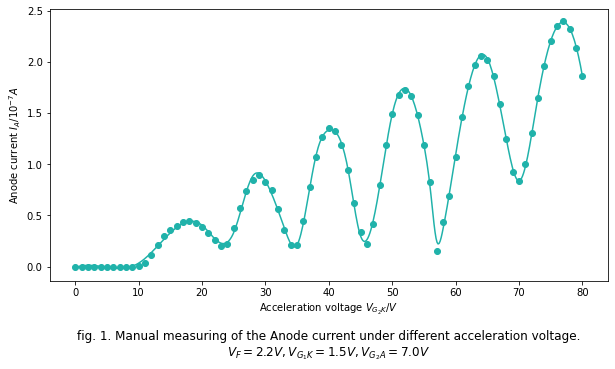

In [10]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df1['U'], df1['I_1'], color='lightseagreen')

U_dns = np.linspace(0, 80, 500)
itp_func = UnivariateSpline(df1['U'], df1['I_1'], s=0.05)
I_1_itp = itp_func(U_dns)
plt.plot(U_dns, I_1_itp, color='lightseagreen')

plt.xlabel('Acceleration voltage $V_{G_2K}/V$')
plt.ylabel('Anode current $I_A/10^{-7}A$')
plt.title('fig. 1. Manual measuring of the Anode current under different acceleration voltage.\n$V_F=2.2V,V_{G_1K}=1.5V,V_{G_2A}=7.0V$', y=-0.3)
plt.savefig(r'C2-Output\fig.1.png', bbox_inches = 'tight', dpi=300)

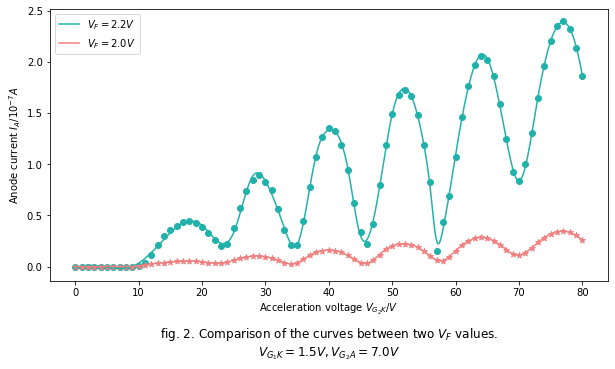

In [12]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df1['U'], df1['I_1'], color='lightseagreen')
plt.scatter(df1['U'], df1['I_2'], marker='*', color='lightcoral')

U_dns = np.linspace(0, 80, 500)
itp_func = UnivariateSpline(df1['U'], df1['I_1'], s=0.05)
I_1_itp = itp_func(U_dns)
plt.plot(U_dns, I_1_itp, color='lightseagreen', label='$V_F=2.2V$')

itp_func = Rbf(df1['U'], df1['I_2'])
I_2_itp = itp_func(U_dns)
plt.plot(U_dns, I_2_itp, color='lightcoral', label='$V_F=2.0V$')

plt.xlabel('Acceleration voltage $V_{G_2K}/V$')
plt.ylabel('Anode current $I_A/10^{-7}A$')
plt.title('fig. 2. Comparison of the curves between two $V_F$ values.\n$V_{G_1K}=1.5V,V_{G_2A}=7.0V$', y=-0.3)
plt.legend()
plt.savefig(r'C2-Output\fig.2.png', bbox_inches = 'tight', dpi=300)

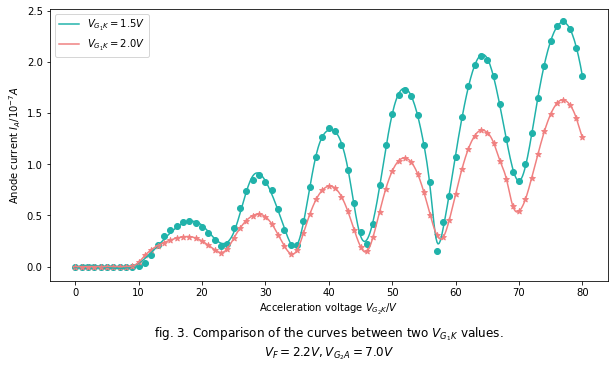

In [3]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df1['U'], df1['I_1'], color='lightseagreen')
plt.scatter(df1['U'], df1['I_3'], marker='*', color='lightcoral')

U_dns = np.linspace(0, 80, 500)
itp_func = UnivariateSpline(df1['U'], df1['I_1'], s=0.05)
I_1_itp = itp_func(U_dns)
plt.plot(U_dns, I_1_itp, color='lightseagreen', label='$V_{G_1K}=1.5V$')

itp_func = Rbf(df1['U'], df1['I_3'])
I_3_itp = itp_func(U_dns)
plt.plot(U_dns, I_3_itp, color='lightcoral', label='$V_{G_1K}=2.0V$')

plt.xlabel('Acceleration voltage $V_{G_2K}/V$')
plt.ylabel('Anode current $I_A/10^{-7}A$')
plt.title('fig. 3. Comparison of the curves between two $V_{G_1K}$ values.\n$V_F=2.2V,V_{G_2A}=7.0V$', y=-0.3)
plt.legend()
plt.savefig(r'C2-Output\fig.3.png', bbox_inches = 'tight', dpi=300)

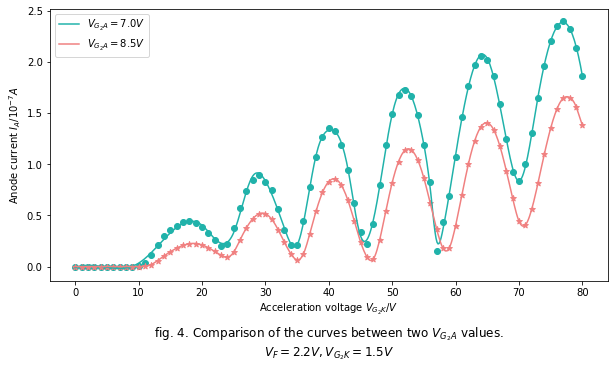

In [14]:
fig = plt.figure(figsize=(10, 5))

plt.scatter(df1['U'], df1['I_1'], color='lightseagreen')
plt.scatter(df1['U'], df1['I_4'], marker='*', color='lightcoral')

U_dns = np.linspace(0, 80, 500)
itp_func = UnivariateSpline(df1['U'], df1['I_1'], s=0.05)
I_1_itp = itp_func(U_dns)
plt.plot(U_dns, I_1_itp, color='lightseagreen', label='$V_{G_2A}=7.0V$')

itp_func = Rbf(df1['U'], df1['I_4'])
I_4_itp = itp_func(U_dns)
plt.plot(U_dns, I_4_itp, color='lightcoral', label='$V_{G_2A}=8.5V$')

plt.xlabel('Acceleration voltage $V_{G_2K}/V$')
plt.ylabel('Anode current $I_A/10^{-7}A$')
plt.title('fig. 4. Comparison of the curves between two $V_{G_2A}$ values.\n$V_F=2.2V,V_{G_2K}=1.5V$', y=-0.3)
plt.legend()
plt.savefig(r'C2-Output\fig.4.png', bbox_inches = 'tight', dpi=300)

## EXP2 Auto measuring

### Calibration

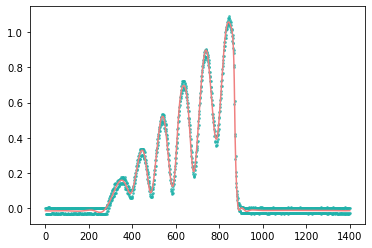

In [8]:
df2 = pd.read_csv(r'C2-Data\2.2 1.5 7.0Waveform.csv')

plt.scatter(df2['X'], df2['CH1'], s=3, color='lightseagreen', label='Original values', alpha=0.7)

X_dns = df2['X']
itp_func = UnivariateSpline(df2['X'], df2['CH1'], s=0.5)
CH1_itp = itp_func(X_dns)
plt.plot(X_dns, CH1_itp, color='lightcoral', label='Interpolation')

#### Find the local maximum

In [9]:
u_max = argrelextrema(np.array(CH1_itp), np.greater)
v_max = CH1_itp[u_max]
x_max = argrelextrema(np.array(I_1_itp), np.greater)
y_max = I_1_itp[x_max]
# *: unpack the tuple

u_max = np.array(*u_max)[2:8]
x_max = (np.array(*x_max)*80/500)[1:]

v_max = v_max[2:8]
y_max = y_max[1:]
print(u_max,x_max,v_max,y_max)

[350 444 539 636 738 842] [18.24 28.64 40.16 51.84 64.16 76.8 ] [0.15922263 0.32959168 0.52184109 0.69672736 0.89768464 1.05730917] [0.44368148 0.91530381 1.33825945 1.74251603 2.07411933 2.39038873]


#### Fitting
- scale_x_func
- scale_y_func

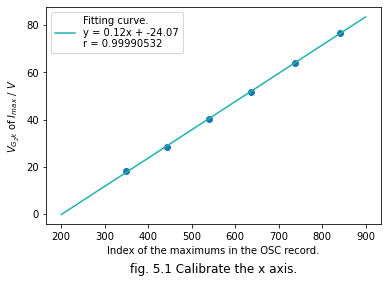

In [39]:
scale_x_func = np.polyfit(u_max, x_max, deg=1)

u_dns = np.linspace(200, 900, 700)
v_reg = np.polyval(scale_x_func, u_dns)

r = np.corrcoef(u_max, x_max)[0,1]

A1, A2 = tuple(scale_x_func)
plt.scatter(u_max, x_max)
plt.plot(u_dns, v_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.2f}x + {:.2f}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()

plt.xlabel('Index of the maximums in the OSC record.')
plt.ylabel('$V_{G_2k}$ of $I_{max}$ / $V$')
plt.title('fig. 5.1 Calibrate the x axis.', y=-0.25)
plt.savefig(r'C2-Output\fig.5.1.png', bbox_inches = 'tight', dpi=300)                        

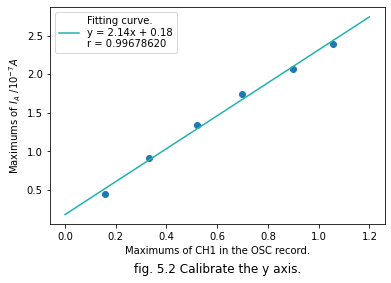

In [41]:
scale_y_func = np.polyfit(v_max, y_max, deg=1)

v_dns = np.linspace(0, 1.2, 100)
v_reg = np.polyval(scale_y_func, v_dns)

r = np.corrcoef(v_max, y_max)[0,1]

A1, A2 = tuple(scale_y_func)
plt.scatter(v_max, y_max)
plt.plot(v_dns, v_reg, color='lightseagreen', 
                          label='Fitting curve. \ny = {:.2f}x + {:.2f}\nr = {:.8f}'
                          .format(A1, A2, r))
plt.legend()

plt.xlabel('Maximums of CH1 in the OSC record.')
plt.ylabel('Maximums of $I_A$ /$10^{-7}A$')
plt.title('fig. 5.2 Calibrate the y axis.', y=-0.25)
plt.savefig(r'C2-Output\fig.5.2.png', bbox_inches = 'tight', dpi=300)  

### Transform the data

In [3]:
dfLIST = []
path = r'C2-Data'
file = glob.glob(os.path.join(path, '**Waveform.csv'))
for f in file:
    dfLIST.append(pd.read_csv(f))
dfLIST

[         X    CH1
 0        0  0.000
 1        1 -0.024
 2        2  0.000
 3        3 -0.024
 4        4  0.000
 ...    ...    ...
 1395  1395  0.000
 1396  1396 -0.024
 1397  1397  0.004
 1398  1398  0.000
 1399  1399 -0.024
 
 [1400 rows x 2 columns],
          X    CH1
 0        0  0.000
 1        1 -0.032
 2        2  0.000
 3        3 -0.032
 4        4  0.000
 ...    ...    ...
 1395  1395  0.000
 1396  1396 -0.024
 1397  1397  0.000
 1398  1398  0.000
 1399  1399 -0.032
 
 [1400 rows x 2 columns],
          X    CH1
 0        0  0.000
 1        1 -0.032
 2        2  0.000
 3        3 -0.032
 4        4  0.000
 ...    ...    ...
 1395  1395 -0.032
 1396  1396  0.000
 1397  1397 -0.024
 1398  1398 -0.024
 1399  1399  0.000
 
 [1400 rows x 2 columns],
          X    CH1
 0        0  0.000
 1        1 -0.032
 2        2  0.000
 3        3 -0.032
 4        4  0.000
 ...    ...    ...
 1395  1395 -0.032
 1396  1396 -0.024
 1397  1397  0.000
 1398  1398 -0.024
 1399  1399  0.000
 
 [

In [57]:
df_Auto = pd.DataFrame(columns=['U', 'I_1', 'I_2', 'I_3', 'I_4', 'I_5', 'I_6', 'I_7'])
df_Auto['U'] = np.polyval(scale_x_func, dfLIST[0]['X'])
for i in np.linspace(0, 6, 7):
        df_Auto['I_{}'.format(int(i)+1)] = np.polyval(scale_y_func, dfLIST[int(i)]['CH1'])
df_Auto.set_index('U', drop=True, inplace=True)
df_Auto
df_Auto.to_csv(r'C2-Data/Auto.csv')

### Find the best parameter 

In [3]:
df3 = pd.read_csv('C2-Data\Auto.csv')

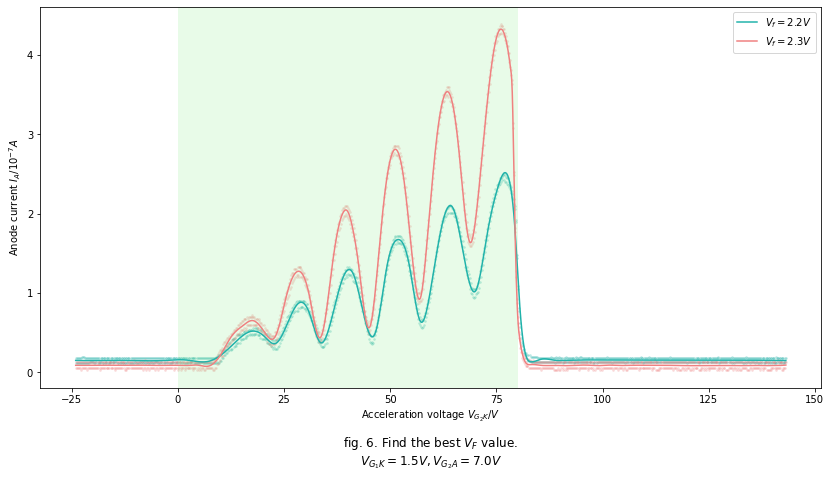

In [60]:
fig = plt.figure(figsize=(14, 7))

plt.scatter(df3['U'], df3['I_4'], s=3, color='lightseagreen', alpha=0.2)
plt.scatter(df3['U'], df3['I_7'], s=3, color='lightcoral', alpha=0.2)


U_dns = df3['U']
itp_func = UnivariateSpline(df3['U'], df3['I_4'], s=3)
I_4_itp = itp_func(U_dns)
plt.plot(U_dns, I_4_itp, color='lightseagreen', label='$V_{f}=2.2V$')


itp_func = UnivariateSpline(df3['U'], df3['I_7'], s=4)
I_7_itp = itp_func(U_dns)
plt.plot(U_dns, I_7_itp, color='lightcoral', label='$V_{f}=2.3V$')

plt.axvspan(xmin=0, xmax=80, facecolor="lightgreen", alpha=0.2)
plt.xlabel('Acceleration voltage $V_{G_2K}/V$')
plt.ylabel('Anode current $I_A/10^{-7}A$')
plt.title('fig. 6. Find the best $V_{F}$ value.\n$V_{G_1K}=1.5V,V_{G_2A}=7.0V$', y=-0.22)
plt.legend()
plt.savefig(r'C2-Output\fig.6.png', bbox_inches = 'tight', dpi=600)

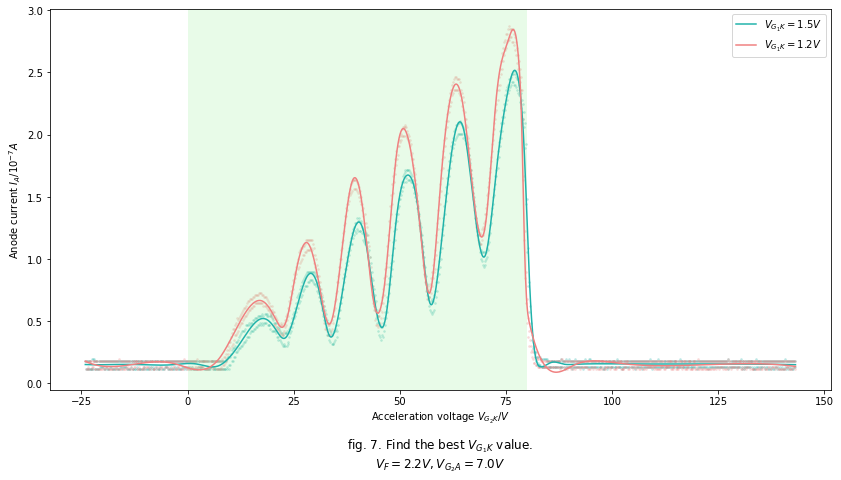

In [6]:
fig = plt.figure(figsize=(14, 7))

plt.scatter(df3['U'], df3['I_4'], s=3, color='lightseagreen', alpha=0.2)
plt.scatter(df3['U'], df3['I_2'], s=3, color='lightcoral', alpha=0.2)


U_dns = df3['U']
itp_func = UnivariateSpline(df3['U'], df3['I_4'], s=3)
I_4_itp = itp_func(U_dns)
plt.plot(U_dns, I_4_itp, color='lightseagreen', label='$V_{G_1K}=1.5V$')


itp_func = UnivariateSpline(df3['U'], df3['I_2'], s=4)
I_2_itp = itp_func(U_dns)
plt.plot(U_dns, I_2_itp, color='lightcoral', label='$V_{G_1K}=1.2V$')



plt.axvspan(xmin=0, xmax=80, facecolor="lightgreen", alpha=0.2)
plt.xlabel('Acceleration voltage $V_{G_2K}/V$')
plt.ylabel('Anode current $I_A/10^{-7}A$')
plt.title('fig. 7. Find the best $V_{G_1K}$ value.\n$V_{F}=2.2V,V_{G_2A}=7.0V$', y=-0.22)
plt.legend()
plt.savefig(r'C2-Output\fig.7.png', bbox_inches = 'tight', dpi=600)

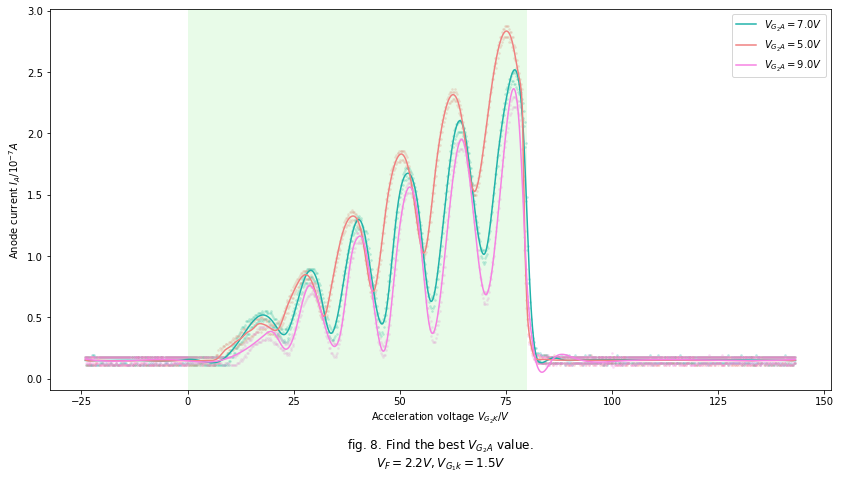

In [62]:
fig = plt.figure(figsize=(14, 7))

plt.scatter(df3['U'], df3['I_4'], s=3, color='lightseagreen', alpha=0.2)
plt.scatter(df3['U'], df3['I_3'], s=3, color='lightcoral', alpha=0.2)
plt.scatter(df3['U'], df3['I_5'], s=3, color='#F681E3', alpha=0.2)

U_dns = df3['U']
itp_func = UnivariateSpline(df3['U'], df3['I_4'], s=3)
I_4_itp = itp_func(U_dns)
plt.plot(U_dns, I_4_itp, color='lightseagreen', label='$V_{G_2A}=7.0V$')


itp_func = UnivariateSpline(df3['U'], df3['I_3'], s=2)
I_3_itp = itp_func(U_dns)
plt.plot(U_dns, I_3_itp, color='lightcoral', label='$V_{G_2A}=5.0V$')

itp_func = UnivariateSpline(df3['U'], df3['I_5'], s=4)
I_5_itp = itp_func(U_dns)
plt.plot(U_dns, I_5_itp, color='#F681E3', label='$V_{G_2A}=9.0V$')

plt.axvspan(xmin=0, xmax=80, facecolor="lightgreen", alpha=0.2)
plt.xlabel('Acceleration voltage $V_{G_2K}/V$')
plt.ylabel('Anode current $I_A/10^{-7}A$')
plt.title('fig. 8. Find the best $V_{G_2A}$ value.\n$V_{F}=2.2V,V_{G_1k}=1.5V$', y=-0.22)
plt.legend()
plt.savefig(r'C2-Output\fig.8.png', bbox_inches = 'tight', dpi=600)

### U0

Text(0.5, -0.18, 'fig. 9. Calculate the first excitated voltage.\n$V_F=2.2V,V_{G_1K}=1.5V,V_{G_2A}=9.0V$')

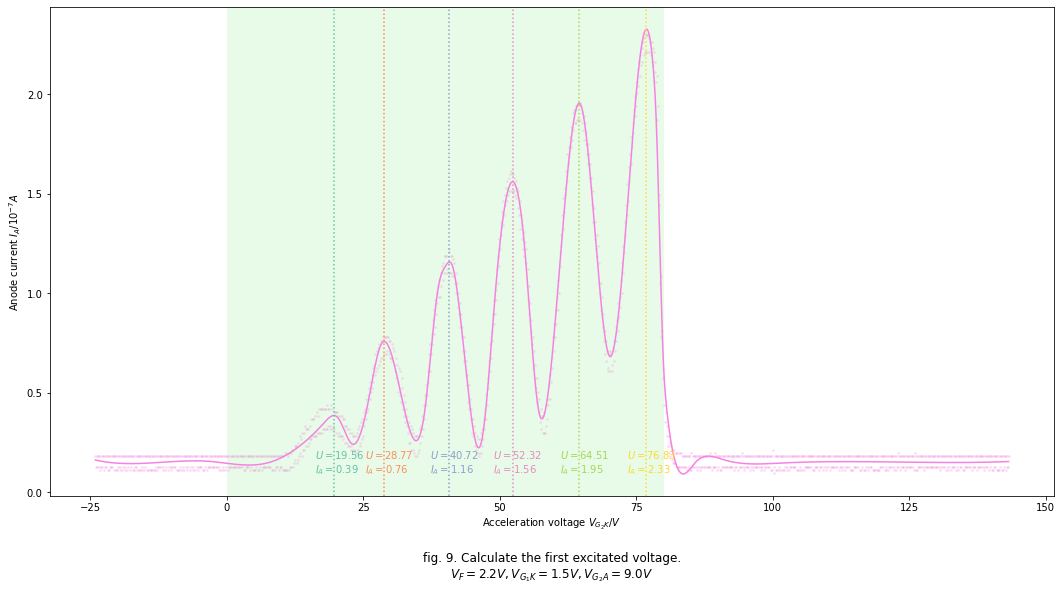

In [4]:
fig = plt.figure(figsize=(18, 9))

plt.scatter(df3['U'], df3['I_5'], s=3, color='#F681E3', alpha=0.2)

U_dns = df3['U']
itp_func = UnivariateSpline(df3['U'], df3['I_5'], s=3)
I_5_itp = itp_func(U_dns)
plt.plot(U_dns, I_5_itp, color='#F681E3')

u_max = argrelextrema(np.array(I_5_itp), np.greater)
i_max = np.array(I_5_itp)[u_max]
u_max = list(df3['U'].iloc[np.array(*u_max)[1:7]])
i_max = i_max[1:7]


for i in np.arange(0, len(u_max), 1):
    plt.axvline(x = u_max[i], ls=':', color=plt.cm.Set2(i))
    plt.annotate('$U={:.2f}$\n$I_A={:.2f}$'.format(u_max[i], i_max[i]), xy=(u_max[i]-3.5, 0.1), color=plt.cm.Set2(i))

plt.axvspan(xmin=0, xmax=80, facecolor="lightgreen", alpha=0.2)
plt.xlabel('Acceleration voltage $V_{G_2K}/V$')
plt.ylabel('Anode current $I_A/10^{-7}A$')
plt.title('fig. 9. Calculate the first excitated voltage.\n$V_F=2.2V,V_{G_1K}=1.5V,V_{G_2A}=9.0V$', y=-0.18)

# plt.savefig(r'C2-Output\fig.9.png', bbox_inches = 'tight', dpi=600)

In [9]:
print(u_max)
diff = np.diff(u_max)
print(diff)
U0 = 11.62
a = 0
for i in diff:
    a = a+(i-U0)**2
print((a/6)**(1/2))

[19.56229702267388, 28.767520551389616, 40.7223563029685, 52.31854698200001, 64.51247944861046, 76.8259602727367]
[ 9.20522353 11.95483575 11.59619068 12.19393247 12.31348082]
1.0609855010184965
